# Telecom Churn prediction Case Study
To predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

In [570]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [571]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

#### Importing and reading data for inspection and cleaning


In [572]:
#Reading data from csv file using pandas
data_df = pd.read_csv("telecom_churn_data.csv")
data_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [573]:
#Code for inspecting columns and shape
#data_df.columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [574]:
all_columns=data_df.columns
date_columns=[x for x in all_columns if 'date' in x]
numeric_columns=[x for x in all_columns if x not in date_columns]

In [575]:
print(len(numeric_columns))

214


#### Inspect Null values

Nulls in each column

In [576]:
# Code for column-wise null count 
data_df.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [577]:
# Code to convert null values to 0 for all numeric columns
data_df[numeric_columns]=data_df[numeric_columns].fillna(0)

In [578]:
from datetime import date,datetime
data_df['last_date_of_month_7']=data_df['last_date_of_month_7'].fillna('7/31/2014')
data_df['last_date_of_month_8']=data_df['last_date_of_month_8'].fillna('8/31/2014')
data_df['last_date_of_month_9']=data_df['last_date_of_month_9'].fillna('9/30/2014')
#data_df['date_of_last_rech_6'] = pd.to_datetime(data_df['date_of_last_rech_6'])
#data_df[date_columns] = pd.to_datetime(data_df[date_columns])
#datetime.datetime.strptime("2013-1-25", '%Y-%m-%d').strftime('%m/%d/%y')
data_df[date_columns]=data_df[date_columns].fillna(datetime.strptime(str(date.max), '%Y-%m-%d').strftime('%m/%d/%Y'))
#data_df[date_columns] = pd.to_datetime(data_df[date_columns])

In [579]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [580]:
# Code for column-wise null percentage
round(100*(data_df[date_columns].isnull().sum()/len(data_df[date_columns].index)), 2)

last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
last_date_of_month_9        0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_9         0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
date_of_last_rech_data_9    0.0
dtype: float64

In [581]:
data_df[date_columns].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,12/31/9999
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,12/31/9999,7/25/2014,8/10/2014,12/31/9999
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,12/31/9999,12/31/9999,12/31/9999,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,12/31/9999,12/31/9999,12/31/9999,12/31/9999
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,12/31/9999,12/31/9999,12/31/9999


#### Deriving new features

In [582]:
# Code for deriving new features
data_df['total_service_packs_6'] = data_df['night_pck_user_6']+data_df['monthly_2g_6']+data_df['sachet_2g_6']+data_df['monthly_3g_6']+data_df['sachet_3g_6']+data_df['fb_user_6']
data_df['total_service_packs_7'] = data_df['night_pck_user_7']+data_df['monthly_2g_7']+data_df['sachet_2g_7']+data_df['monthly_3g_7']+data_df['sachet_3g_7']+data_df['fb_user_7']
data_df['total_service_packs_8'] = data_df['night_pck_user_8']+data_df['monthly_2g_8']+data_df['sachet_2g_8']+data_df['monthly_3g_8']+data_df['sachet_3g_8']+data_df['fb_user_8']
data_df['total_service_packs_9'] = data_df['night_pck_user_9']+data_df['monthly_2g_9']+data_df['sachet_2g_9']+data_df['monthly_3g_9']+data_df['sachet_3g_9']+data_df['fb_user_9']
data_df['diff_ic_og_6'] = data_df['total_ic_mou_6']-data_df['total_og_mou_6']
data_df['diff_ic_og_7'] = data_df['total_ic_mou_7']-data_df['total_og_mou_7']
data_df['diff_ic_og_8'] = data_df['total_ic_mou_8']-data_df['total_og_mou_8']
data_df['diff_ic_og_9'] = data_df['total_ic_mou_9']-data_df['total_og_mou_9']
data_df['diff_vol_3g_2g_6'] = data_df['vol_3g_mb_6']-data_df['vol_2g_mb_6']
data_df['diff_vol_3g_2g_7'] = data_df['vol_3g_mb_7']-data_df['vol_2g_mb_7']
data_df['diff_vol_3g_2g_8'] = data_df['vol_3g_mb_8']-data_df['vol_2g_mb_8']
data_df['diff_vol_3g_2g_9'] = data_df['vol_3g_mb_9']-data_df['vol_2g_mb_9']
data_df['diff_total_service_packs_good_active_phase']=data_df['total_service_packs_6']+data_df['total_service_packs_7']-data_df['total_service_packs_8']
data_df['diff_ic_good_active_phase']=data_df['total_ic_mou_6']+data_df['total_ic_mou_7']-data_df['total_ic_mou_8']
data_df['diff_og_good_active_phase']=data_df['total_og_mou_6']+data_df['total_og_mou_7']-data_df['total_og_mou_8']
data_df['diff_2g_good_active_phase']=data_df['vol_2g_mb_6']+data_df['vol_2g_mb_7']-data_df['vol_2g_mb_8']
data_df['diff_3g_good_active_phase']=data_df['vol_3g_mb_6']+data_df['vol_3g_mb_7']-data_df['vol_3g_mb_8']
data_df['diff_total_rech_amt_good_active']= data_df['total_rech_amt_6']+data_df['total_rech_amt_7']-data_df['total_rech_amt_8']

### Filering High value customers

In [583]:
#Filtering the high value cuustomers
data_df['total_rech_data_amt_good_phase'] = data_df['total_rech_data_6']*data_df['av_rech_amt_data_6']+ data_df['total_rech_data_7']*data_df['av_rech_amt_data_7']
data_df['total_rech_amt_good_phase'] = data_df['total_rech_amt_6']+data_df['total_rech_amt_7']
data_df['total_amt_good_phase'] = data_df['total_rech_data_amt_good_phase']+data_df['total_rech_amt_good_phase']
data_df['total_amt_good_phase'].describe(percentiles=[.25,.5,.70,.90,.95,.99])


count     99999.000000
mean        970.656135
std        1738.847187
min           0.000000
25%         256.000000
50%         550.000000
70%         956.000000
90%        2056.000000
95%        3024.000000
99%        6727.020000
max      122472.000000
Name: total_amt_good_phase, dtype: float64

In [584]:
data_df_hvc=data_df[data_df['total_amt_good_phase']>=956.00]

In [585]:
data_df_hvc.shape

(30001, 247)

### Churn tagging

In [586]:
data_df_hvc['churn']=data_df_hvc['total_ic_mou_9']+data_df_hvc['total_og_mou_9']+data_df_hvc['vol_2g_mb_9']+data_df_hvc['vol_3g_mb_9']
data_df_hvc['churn']=data_df_hvc['churn'].apply(lambda x: 1 if x==0 else 0)

In [587]:
data_df_hvc.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [588]:
columns_without_churn_details=[x for x in data_df_hvc.columns if '_9' not in x and 'sep' not in x]

In [589]:
columns_without_churn_details

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_o

In [590]:
data_df_hvc = data_df_hvc[columns_without_churn_details]

In [591]:
data_df_hvc.shape

(30001, 190)

#### Checking for duplicates

In [592]:
print(any(data_df_hvc['mobile_number'].duplicated())) 

False


#### Checking outliers

In [593]:
# Checking for outliers in the continuous variables
num_df = data_df_hvc[[x for x in data_df_hvc.columns if x not in date_columns]]

In [594]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_df.describe(percentiles=[0.02,.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,diff_total_service_packs_good_active_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase,churn
count,3.000100e+04,30001.0,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,109.0,0.0,0.0,0.0,558.490824,560.782203,508.597957,260.793024,267.819295,...,2.478751,306.784552,686.553486,145.706439,362.961271,736.864905,984.010898,1321.230359,2305.241257,0.081364
std,6.908784e+05,0.0,0.0,0.0,0.0,460.640461,479.776947,501.961981,459.644368,479.993989,...,4.303412,463.017407,929.394533,461.537512,1160.818150,712.344917,2477.074460,1030.346823,2717.427964,0.273398
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,-46.000000,-3213.830000,-11494.350000,-5006.980000,-15638.140000,-8284.000000,0.000000,0.000000,956.000000,0.000000
2%,7.000049e+09,109.0,0.0,0.0,0.0,39.839000,43.957000,0.000000,0.000000,0.000000,...,-3.000000,-123.910000,-274.600000,-303.410000,-805.650000,-141.000000,0.000000,250.000000,974.000000,0.000000
25%,7.000609e+09,109.0,0.0,0.0,0.0,309.865000,309.826000,231.473000,17.080000,16.030000,...,0.000000,59.440000,94.510000,0.000000,0.000000,347.000000,0.000000,818.000000,1206.000000,0.000000
50%,7.001203e+09,109.0,0.0,0.0,0.0,481.694000,480.943000,427.585000,84.580000,82.810000,...,2.000000,184.820000,424.060000,0.000000,0.000000,616.000000,308.000000,1137.000000,1600.000000,0.000000
75%,7.001804e+09,109.0,0.0,0.0,0.0,699.943000,698.315000,661.491000,290.440000,290.240000,...,4.000000,402.890000,978.020000,110.420000,387.220000,980.000000,1000.000000,1591.000000,2416.000000,0.000000
90%,7.002165e+09,109.0,0.0,0.0,0.0,994.099000,995.859000,977.345000,754.160000,784.480000,...,7.000000,746.340000,1751.760000,524.170000,1314.410000,1446.000000,2465.000000,2236.000000,3983.000000,0.000000
95%,7.002285e+09,109.0,0.0,0.0,0.0,1240.964000,1261.272000,1255.019000,1135.440000,1185.790000,...,10.000000,1062.580000,2425.040000,910.960000,2102.810000,1847.000000,4053.000000,2812.000000,5597.000000,1.000000


#### We can see outliers in our data. We will treat these outliers now.

In [595]:
filt_df = data_df_hvc[[x for x in data_df_hvc.columns if x not in date_columns]]
low = .001
high = .999
quant_df = filt_df.quantile([low, high])
quant_df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,diff_total_service_packs_good_active_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase,churn
0.001,7.000002e+09,109.0,0.0,0.0,0.0,-3.000,-7.420,-5.000,0.00,0.00,...,-11.0,-930.21,-2169.95,-1705.55,-3827.87,-1302.0,0.0,86.0,956.0,0.0
0.999,7.002408e+09,109.0,0.0,0.0,0.0,3884.712,4115.703,3976.261,4136.34,4355.98,...,35.0,4323.76,7376.20,4474.42,11801.97,5850.0,30059.0,8562.0,34817.0,1.0


In [596]:
filt_df = filt_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x <= quant_df.loc[high,x.name])], axis=0)

In [597]:
#Merging with the leads dataframe
data_df_hvc = pd.concat([data_df_hvc.loc[:, ~data_df_hvc.columns.isin([x for x in data_df_hvc.columns if x not in date_columns])], filt_df], axis=1)

In [598]:
#Dropping NA values
data_df_hvc.dropna(inplace=True)
data_df_hvc.shape

(27861, 190)

In [599]:
data_df_hvc.churn.value_counts()

0    25603
1     2258
Name: churn, dtype: int64

### Checking correlations

In [600]:
# Let's see the correlation matrix 

data_df_hvc.corr()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,diff_total_service_packs_good_active_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase,churn
mobile_number,1.000000,NaN,NaN,NaN,NaN,0.040582,0.042131,0.051268,0.008680,0.005527,...,-0.045911,0.061251,0.010018,-0.009346,-0.025159,0.025764,-0.041582,0.048917,-0.019247,-0.030761
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,0.040582,NaN,NaN,NaN,NaN,1.000000,0.568407,0.486615,0.428337,0.265129,...,-0.204380,0.280956,0.559188,-0.095560,0.068604,0.726384,-0.081204,0.856907,0.278579,0.071444
arpu_7,0.042131,NaN,NaN,NaN,NaN,0.568407,1.000000,0.678730,0.282150,0.427827,...,-0.222945,0.206619,0.444908,-0.113225,0.035164,0.595882,-0.068533,0.869382,0.295814,-0.034008
arpu_8,0.051268,NaN,NaN,NaN,NaN,0.486615,0.678730,1.000000,0.194485,0.301670,...,-0.266891,0.099648,0.094922,-0.132430,-0.060451,0.105658,-0.075031,0.664284,0.204464,-0.217259
onnet_mou_6,0.008680,NaN,NaN,NaN,NaN,0.428337,0.282150,0.194485,1.000000,0.753792,...,-0.205499,0.064964,0.624233,-0.112203,-0.122093,0.358347,-0.180307,0.398101,-0.006223,0.071940
onnet_mou_7,0.005527,NaN,NaN,NaN,NaN,0.265129,0.427827,0.301670,0.753792,1.000000,...,-0.216265,0.018560,0.519061,-0.119536,-0.130805,0.272603,-0.185208,0.393708,-0.012710,0.015358


In [601]:
#Removing variables which do not capture any variance
data_df_hvc=data_df_hvc.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],1)

In [602]:
#Converting datetime to categories
data_df_hvc['date_of_last_rech_6'] = data_df_hvc['date_of_last_rech_6'].astype('category')
data_df_hvc['date_of_last_rech_7'] = data_df_hvc['date_of_last_rech_7'].astype('category')
data_df_hvc['date_of_last_rech_8'] = data_df_hvc['date_of_last_rech_8'].astype('category')
data_df_hvc['date_of_last_rech_data_6'] = data_df_hvc['date_of_last_rech_data_6'].astype('category')
data_df_hvc['date_of_last_rech_data_7'] = data_df_hvc['date_of_last_rech_data_7'].astype('category')
data_df_hvc['date_of_last_rech_data_8'] = data_df_hvc['date_of_last_rech_data_8'].astype('category')
cat_columns = data_df_hvc.select_dtypes(['category']).columns
data_df_hvc[cat_columns] = data_df_hvc[cat_columns].apply(lambda x: x.cat.codes)


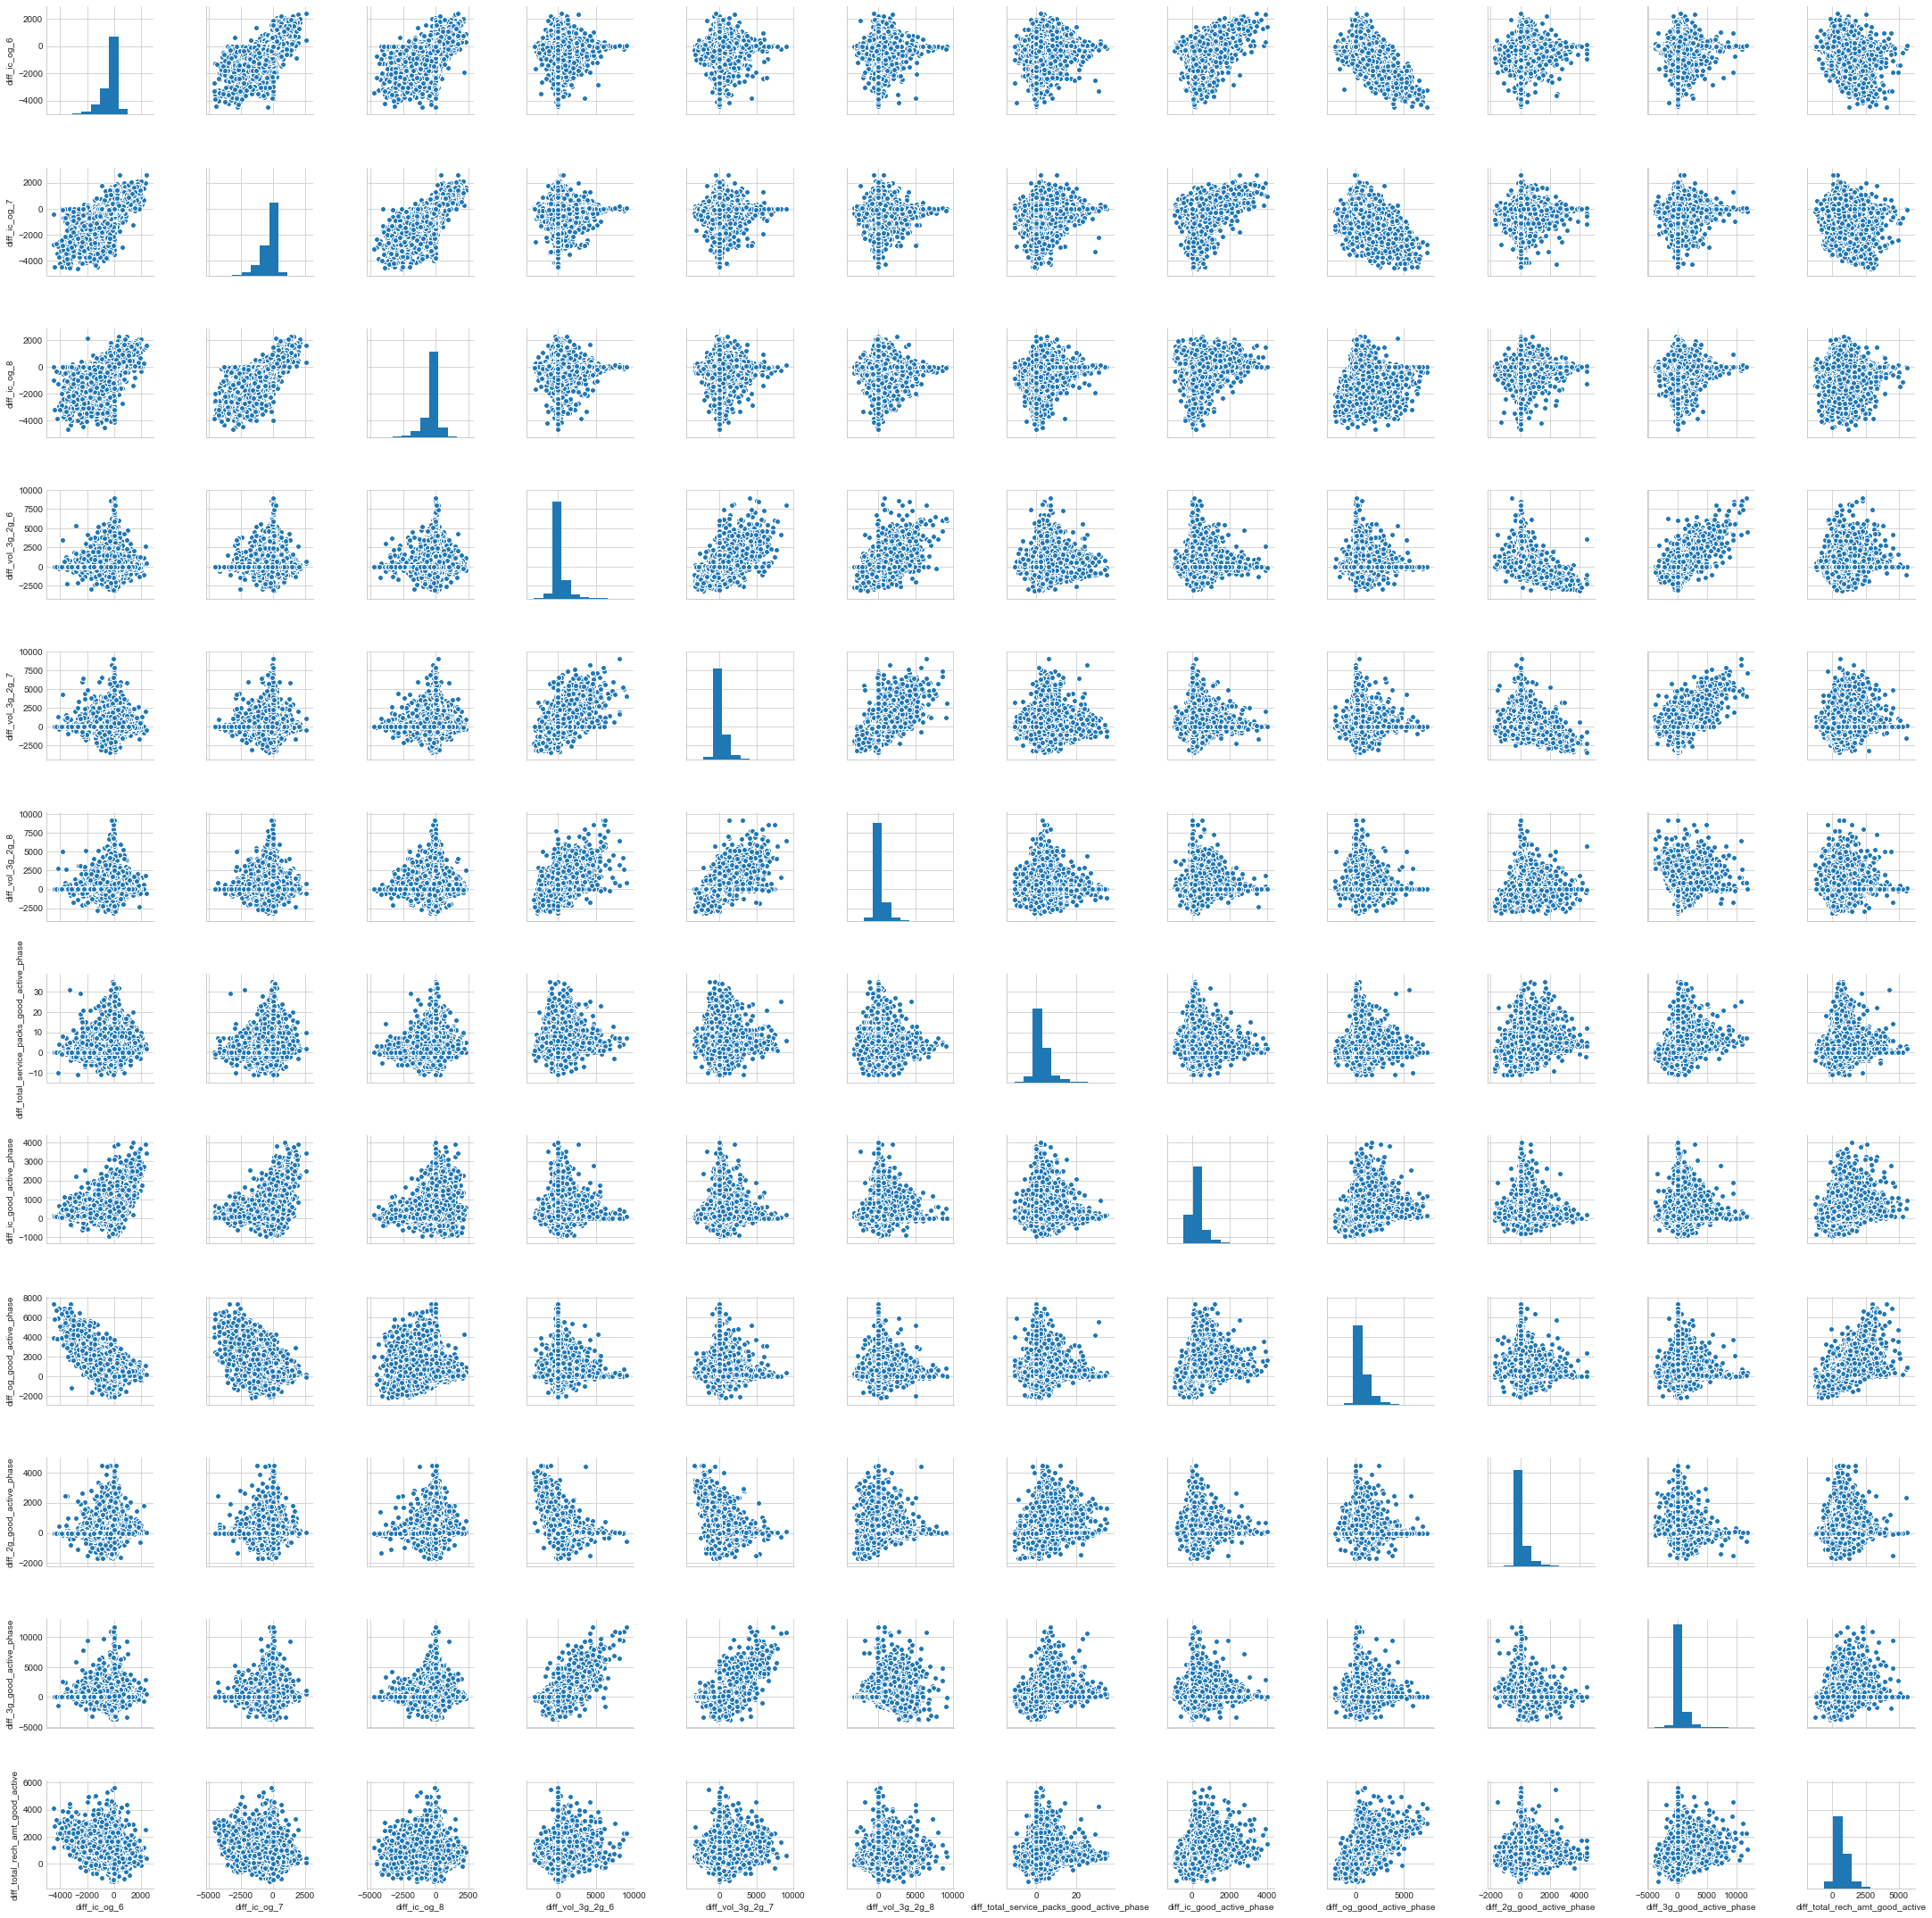

In [603]:
### EDA on derived variables.
# the commonly used alias for seaborn is sns
import seaborn as sns

sns.pairplot(data_df_hvc[[x for x in data_df_hvc.columns if 'diff' in x]])
plt.show()

### Handling Class Imbalance using SMOTE

Text(0.5,1,'churned')

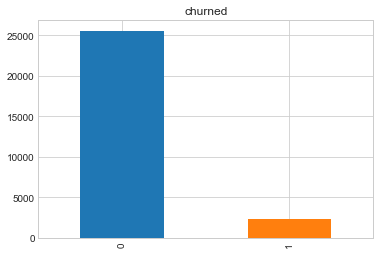

In [604]:
data_df_hvc['churn'].value_counts().plot('bar').set_title('churned')

In [605]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Separate input features and target
y = data_df_hvc.churn
X = data_df_hvc.drop('churn', axis=1)
# scaling the features
X_scaled = scale(X)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, test_size=0.3, random_state=100)

sm = SMOTE(random_state=100, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

Text(0.5,1,'churned')

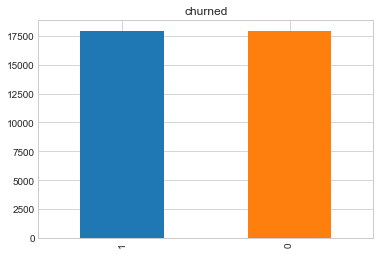

In [606]:
pd.DataFrame(y_train)[0].value_counts().plot('bar').set_title('churned')

### Performing PCA for feature reduction

In [607]:
X_train.shape

(35936, 182)

In [608]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [609]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [610]:
pca.components_

array([[-5.68742944e-02, -4.68017313e-02, -1.80483989e-02, ...,
         1.18766750e-01, -1.15185977e-01,  6.51577065e-02],
       [-2.59307193e-03,  4.60930282e-02,  5.69476437e-02, ...,
         1.87860287e-02,  1.57345131e-01,  8.32100182e-02],
       [ 6.83852104e-04, -1.18015765e-02,  4.81331241e-04, ...,
         7.19608233e-02,  6.59920207e-02,  9.58633666e-02],
       ...,
       [-0.00000000e+00, -8.99093645e-17,  5.43071476e-17, ...,
        -6.63073685e-11, -6.04705922e-11,  6.96982528e-11],
       [-0.00000000e+00, -1.20221386e-16, -1.03578151e-17, ...,
         2.33722885e-11,  6.46871119e-11, -2.45676562e-11],
       [-0.00000000e+00, -2.94370795e-18, -3.82823635e-17, ...,
        -1.76511878e-11, -4.50489223e-11,  1.85537107e-11]])

#### Looking at the screeplot to assess the number of needed principal components


In [611]:
pca.explained_variance_ratio_

array([1.41664373e-01, 9.11593994e-02, 6.11852926e-02, 5.88951283e-02,
       4.14217473e-02, 3.51036937e-02, 2.98802120e-02, 2.90093944e-02,
       2.33297202e-02, 2.23286393e-02, 1.93679622e-02, 1.92862996e-02,
       1.56463107e-02, 1.44283841e-02, 1.40528464e-02, 1.31754021e-02,
       1.26793443e-02, 1.25142060e-02, 1.11476529e-02, 1.10081753e-02,
       1.06999920e-02, 1.00398477e-02, 9.88719774e-03, 9.08373239e-03,
       8.78323086e-03, 8.54892014e-03, 8.45365736e-03, 7.92438968e-03,
       7.27023583e-03, 7.09983278e-03, 6.98370461e-03, 6.58134121e-03,
       6.32741022e-03, 6.26444845e-03, 6.11746906e-03, 5.93001328e-03,
       5.62315590e-03, 5.52412899e-03, 5.48325745e-03, 5.38368344e-03,
       5.23960516e-03, 5.15982188e-03, 4.96171749e-03, 4.88851113e-03,
       4.82906765e-03, 4.69619158e-03, 4.40589578e-03, 4.36540184e-03,
       4.29971723e-03, 4.12570091e-03, 4.03654898e-03, 3.89644248e-03,
       3.85570764e-03, 3.68823848e-03, 3.56991735e-03, 3.56553500e-03,
      

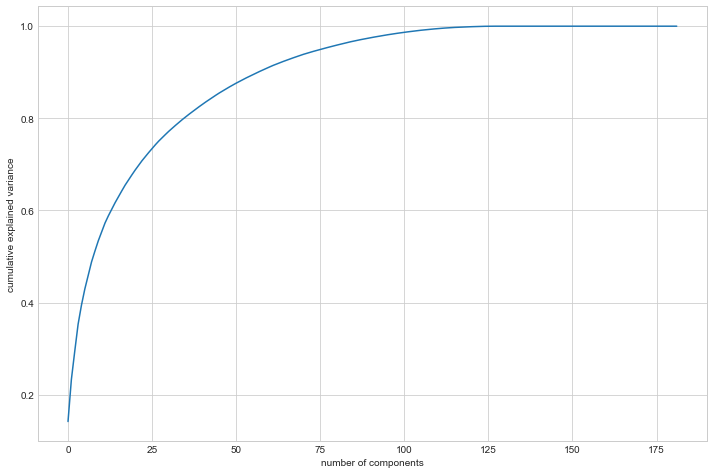

In [612]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### We came to know that using 55 components we can see more than 90% of variance is explained.

In [613]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

In [614]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(35936, 55)

In [615]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [616]:
corrmat

array([[ 1.00000000e+00, -2.50140917e-06, -1.41723527e-05, ...,
         8.87319559e-05,  3.09104514e-05, -3.70041361e-05],
       [-2.50140917e-06,  1.00000000e+00,  8.33393673e-06, ...,
        -1.05329064e-04, -1.40617801e-05, -7.17528079e-05],
       [-1.41723527e-05,  8.33393673e-06,  1.00000000e+00, ...,
        -1.13038059e-04,  1.56795875e-04,  1.55877434e-05],
       ...,
       [ 8.87319559e-05, -1.05329064e-04, -1.13038059e-04, ...,
         1.00000000e+00,  4.79969783e-03,  4.00649310e-03],
       [ 3.09104514e-05, -1.40617801e-05,  1.56795875e-04, ...,
         4.79969783e-03,  1.00000000e+00, -1.80614304e-03],
       [-3.70041361e-05, -7.17528079e-05,  1.55877434e-05, ...,
         4.00649310e-03, -1.80614304e-03,  1.00000000e+00]])

In [617]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.027529575392311895 , min corr:  -0.015839937019663387


In [618]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8359, 55)

#### Applying a logistic regression on our Principal Components

In [619]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [620]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]
y_train_pred

array([0.0148676 , 0.66278125, 0.00602381, ..., 0.99183061, 0.86651268,
       0.89710423])

In [621]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.014868
1,0,0.662781
2,0,0.006024
3,0,0.013841
4,0,0.001883


In [622]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014868,1,0,0,0,0,0,0,0,0,0
1,0,0.662781,1,1,1,1,1,1,1,0,0,0
2,0,0.006024,1,0,0,0,0,0,0,0,0,0
3,0,0.013841,1,0,0,0,0,0,0,0,0,0
4,0,0.001883,1,0,0,0,0,0,0,0,0,0


In [623]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.728545  0.980076  0.477015
0.2   0.2  0.789320  0.961098  0.617542
0.3   0.3  0.820152  0.930265  0.710040
0.4   0.4  0.838073  0.898152  0.777994
0.5   0.5  0.846783  0.859973  0.833593
0.6   0.6  0.847395  0.813224  0.881567
0.7   0.7  0.837461  0.757513  0.917409
0.8   0.8  0.797139  0.646093  0.948186
0.9   0.9  0.683270  0.388969  0.977571


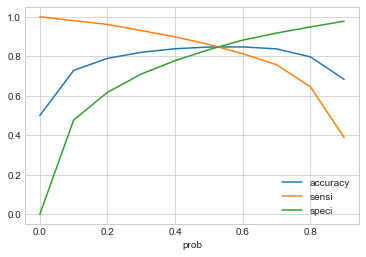

In [624]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.53 is the optimum point to take it as a cutoff probability.

In [625]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.014868,1,0,0,0,0,0,0,0,0,0,0
1,0,0.662781,1,1,1,1,1,1,1,0,0,0,1
2,0,0.006024,1,0,0,0,0,0,0,0,0,0,0
3,0,0.013841,1,0,0,0,0,0,0,0,0,0,0
4,0,0.001883,1,0,0,0,0,0,0,0,0,0,0


In [626]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[15275,  2693],
       [ 2765, 15203]], dtype=int64)

In [627]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
y_test_df=pd.DataFrame(y_test)
y_pred_df=pd.DataFrame(pred_probs_test)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_pred_final=pd.concat([y_test_df, y_pred_df],axis=1)
#"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

In [628]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Churn_prob'})


In [629]:
#y_test_pred_final.head()
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x > 0.53 else 0)

In [630]:
#y_test_pred_final.info()
#y_test_pred_final['churn']=pd.to_numeric(y_test_pred_final['churn'])
#y_test_pred_final.info()
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )

In [631]:
confusion2

array([[6378, 1257],
       [ 137,  587]], dtype=int64)

In [632]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [633]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8107734806629834

In [634]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3183297180043384


In [635]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9789716039907905


In [636]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, pred_probs_test, drop_intermediate = False )

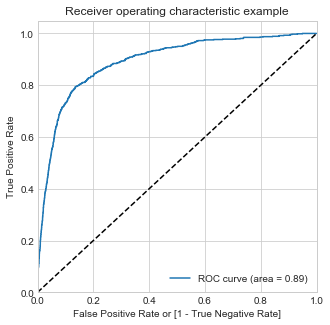

In [637]:
draw_roc(y_test, pred_probs_test)

#### Using SVM Model

In [638]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)

In [639]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[7053,  582],
       [ 280,  444]], dtype=int64)

In [640]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8968776169398254
precision 0.4327485380116959
recall 0.6132596685082873


## Hyperparameter Tuning 

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

In [645]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [646]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,52.228551,1.927089,5.956186,0.239925,1,0.01,"{'C': 1, 'gamma': 0.01}",0.960790,0.963298,0.957010,...,0.960437,0.005139,5,0.965488,0.967697,0.967173,0.967958,0.967434,0.967150,0.000871
1,48.156379,3.586695,7.459751,0.291272,1,0.001,"{'C': 1, 'gamma': 0.001}",0.869021,0.865048,0.869907,...,0.867986,0.003082,10,0.871904,0.869957,0.871539,0.871204,0.870432,0.871007,0.000715
2,61.159198,5.622438,10.493929,1.176050,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.849277,0.843874,0.843776,...,0.845222,0.002467,12,0.846090,0.848191,0.845930,0.845724,0.843724,0.845932,0.001417
3,85.630915,7.076226,4.800818,0.437571,10,0.01,"{'C': 10, 'gamma': 0.01}",0.993882,0.995483,0.992976,...,0.994268,0.001075,3,0.997217,0.997643,0.997640,0.996928,0.997141,0.997314,0.000284
4,55.596294,4.099923,8.136451,0.499798,10,0.001,"{'C': 10, 'gamma': 0.001}",0.913793,0.912196,0.910649,...,0.910692,0.003265,7,0.914208,0.917995,0.918315,0.916300,0.916109,0.916585,0.001479
5,59.523614,7.549662,8.970634,0.343879,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.855951,0.853473,0.847429,...,0.852618,0.003049,11,0.853813,0.854083,0.854813,0.855218,0.853347,0.854255,0.000676
6,122.400156,15.700475,2.830529,0.117588,100,0.01,"{'C': 100, 'gamma': 0.01}",0.997775,0.999153,0.998033,...,0.997947,0.000657,1,0.999930,0.999931,0.999931,0.999930,1.000000,0.999944,0.000028
7,74.995533,1.763164,5.016857,0.112853,100,0.001,"{'C': 100, 'gamma': 0.001}",0.948832,0.953416,0.946614,...,0.949806,0.003569,6,0.955399,0.956537,0.955861,0.956370,0.954324,0.955698,0.000795
8,47.063146,1.086928,6.835069,0.330921,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.873749,0.874929,0.875527,...,0.873846,0.002355,9,0.876078,0.875988,0.877368,0.877138,0.876290,0.876573,0.000569
9,125.834809,12.237683,2.590577,0.132647,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.996107,0.997459,0.996909,...,0.996665,0.000502,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [647]:
# printing the optimal roc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9979469254709663 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [648]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(df_train_pca,y_train)
y_pred = model.predict(df_test_pca)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))
print("roc_auc_score", metrics.roc_auc_score(y_test, y_pred))


[[7201  434]
 [ 404  320]] 

accuracy 0.8997487737767675
precision 0.4244031830238727
sensitivity/recall 0.4419889502762431
roc_auc_score 0.6925727331603875


#### Using Random Forest Model

In [649]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [650]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [651]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [652]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95      7635
          1       0.44      0.44      0.44       724

avg / total       0.90      0.90      0.90      8359



In [653]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  7.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [3, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [654]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.9362862976038763 using {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [655]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=200)

In [656]:
# fit
rfc.fit(df_train_pca,y_train)
# predict
predictions = rfc.predict(df_test_pca)

In [657]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92      7635
          1       0.36      0.74      0.49       724

avg / total       0.92      0.86      0.88      8359



In [658]:
# metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[6692  943]
 [ 188  536]] 

accuracy 0.864696734059098
precision 0.36240703177822853
sensitivity/recall 0.7403314917127072
roc_auc_score 0.8084106705452863


## Based on the above models the best model is first one i.e Logistic regression model which gives recall of 81% and ROC value of .89

### Model Building for identifying important predictor attributes which help the business understand indicators of churn


In [677]:
y = data_df_hvc.churn
X = data_df_hvc.drop('churn', axis=1)
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, train_size=0.7, test_size=0.3, random_state=100)


In [678]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 60)             # running RFE with 60 variables as output
rfe = rfe.fit(X_train, y_train)

In [679]:
rfe.support_

array([False, False,  True, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,

In [681]:
X_scaled_df.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,mobile_number,arpu_6,arpu_7,arpu_8,...,diff_vol_3g_2g_8,diff_total_service_packs_good_active_phase,diff_ic_good_active_phase,diff_og_good_active_phase,diff_2g_good_active_phase,diff_3g_good_active_phase,diff_total_rech_amt_good_active,total_rech_data_amt_good_phase,total_rech_amt_good_phase,total_amt_good_phase
0,-1.198162,-2.562876,1.754628,0.463638,-0.189903,2.001931,-0.530951,-0.986211,-0.947754,-0.737110,...,-0.147882,-0.110538,-0.788733,-0.798892,-0.283613,-0.227086,-0.621740,-0.220594,-0.906864,-0.586440
1,0.035140,-0.549843,-0.216251,-0.937936,-0.954926,-0.879224,-0.735825,1.572421,2.449825,7.518538,...,-0.288681,-0.620382,1.274749,0.098136,-0.347993,-0.365658,-3.574905,-0.532155,1.580078,0.149865
2,-0.375961,0.859280,0.679603,-0.937936,1.435770,0.657392,0.459064,-0.454008,-0.117371,-0.950477,...,-0.272535,-0.875304,-0.460045,0.124388,0.543726,0.455430,0.385598,-0.313320,-0.306372,-0.425300
3,0.857342,0.859280,0.858774,-0.937936,-0.954926,-0.879224,1.329010,-0.055648,0.198519,0.446264,...,-0.288681,-0.620382,-0.562704,0.187020,-0.347993,-0.365658,-0.259388,-0.532155,0.036361,-0.491167
4,-2.020364,1.664493,-0.574593,-0.937936,1.818282,1.809854,-0.466061,-1.347306,-1.010372,-0.309592,...,1.080419,-0.620382,-0.654330,-0.756913,-0.346815,-0.822117,-1.250419,-0.092013,-1.133465,-0.558211


In [682]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('date_of_last_rech_6', False, 104),
 ('date_of_last_rech_7', False, 76),
 ('date_of_last_rech_8', True, 1),
 ('date_of_last_rech_data_6', False, 58),
 ('date_of_last_rech_data_7', True, 1),
 ('date_of_last_rech_data_8', True, 1),
 ('mobile_number', False, 112),
 ('arpu_6', True, 1),
 ('arpu_7', False, 46),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 42),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 34),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 105),
 ('roam_ic_mou_7', False, 2),
 ('roam_ic_mou_8', False, 4),
 ('roam_og_mou_6', False, 44),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 3),
 ('loc_og_t2t_mou_6', False, 41),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 48),
 ('loc_og_t2m_mou_8', False, 92),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 49),
 ('loc_og_t2f_mou_8', False, 47),
 ('loc_og_t2c_mou_6

In [683]:
col = X_train.columns[rfe.support_]

In [684]:
X_train.columns[~rfe.support_]

Index(['date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_data_6', 'mobile_number', 'arpu_7', 'onnet_mou_6',
       'onnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       ...
       'diff_ic_og_8', 'diff_vol_3g_2g_6', 'diff_vol_3g_2g_7',
       'diff_vol_3g_2g_8', 'diff_total_service_packs_good_active_phase',
       'diff_og_good_active_phase', 'diff_3g_good_active_phase',
       'diff_total_rech_amt_good_active', 'total_rech_data_amt_good_phase',
       'total_rech_amt_good_phase'],
      dtype='object', length=122)

In [685]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train[col],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [686]:
# Making predictions
predictions = rfc.predict(X_test[col])

In [687]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      7635
          1       0.73      0.43      0.54       724

avg / total       0.93      0.94      0.93      8359



### Hyperparameter Tuning

In [693]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,12,16],
    'min_samples_leaf': range(100, 800, 200),
    'min_samples_split': range(200, 1000, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [6,9,12]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train[col],y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed: 30.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 12, 16], 'min_samples_leaf': range(100, 800, 200), 'min_samples_split': range(200, 1000, 200), 'n_estimators': [100, 200, 300], 'max_features': [3, 6, 9, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [694]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9197320663207108 using {'max_depth': 12, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [695]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [696]:
# fit
rfc.fit(X_train[col],y_train)
# predict
predictions = rfc.predict(X_test[col])

In [697]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      7635
          1       0.74      0.49      0.59       724

avg / total       0.94      0.94      0.94      8359



In [698]:
# metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[7511  124]
 [ 366  358]] 

accuracy 0.9413805479124298
precision 0.7427385892116183
sensitivity/recall 0.494475138121547
roc_auc_score 0.7391170713528494


#### Advanced Metrics beyond simply accuracy

In [699]:
confusion=metrics.confusion_matrix(y_test, predictions)

In [700]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [701]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
Senstivity

0.494475138121547

In [702]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.9837590045841519

In [703]:
# Calculate false postive rate - predicting conversion when customer have not converted
FPR=FP/ float(TN+FP)
FPR

0.01624099541584807

In [704]:
# positive predictive value 
PPV = TP / float(TP+FP)
PPV

0.7427385892116183

In [705]:
# Negative predictive value
NPV = TN / float(TN+ FN)
NPV

0.9535356100038086

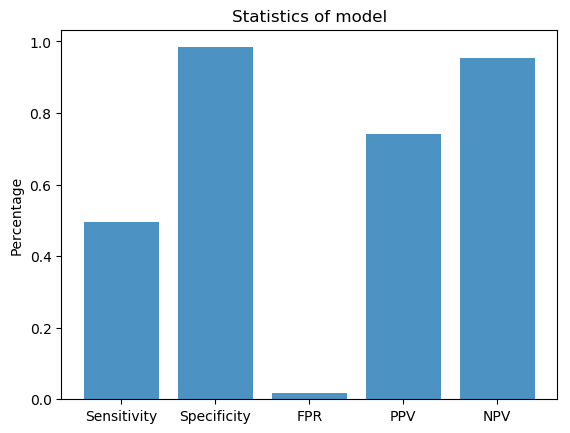

In [706]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Sensitivity', 'Specificity', 'FPR', 'PPV', 'NPV')
y_pos = np.arange(len(objects))
values = [Senstivity,specificity,FPR,PPV,NPV]

plt.bar(y_pos, values, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Statistics of model')

plt.show()

#### Finding important features in original data on which our model depends

In [726]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

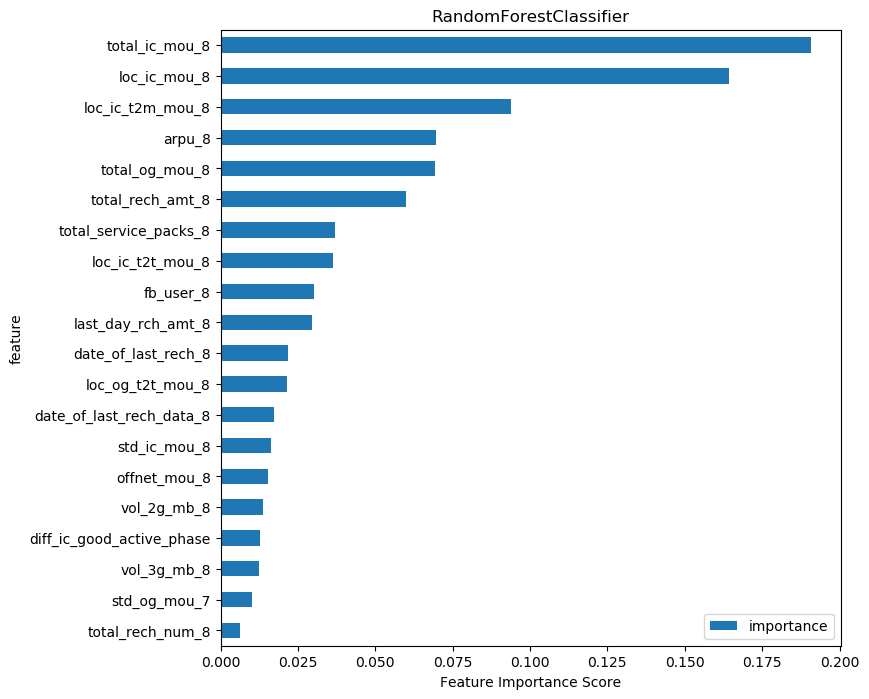

,importance
feature,
total_rech_num_8,0.006264
std_og_mou_7,0.010188
vol_3g_mb_8,0.012536
diff_ic_good_active_phase,0.012764
vol_2g_mb_8,0.013634
offnet_mou_8,0.015317
std_ic_mou_8,0.016179
date_of_last_rech_data_8,0.017369
loc_og_t2t_mou_8,0.021483


In [729]:
plot_feature_importances(rfc, X_train[col], y_train, top_n=20,title=rfc.__class__.__name__)

## Above is the list of top 20 features with their scores which are important in predicting churn.
 

